In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/f2019-aihw7/mnist-train-labels.npy
/kaggle/input/f2019-aihw7/mnist-train-images.npy
/kaggle/input/f2019-aihw7/mnist-val-images.npy
/kaggle/input/f2019-aihw7/scan-train-labels.npy
/kaggle/input/f2019-aihw7/scan-test-images.npy
/kaggle/input/f2019-aihw7/mnist-val-labels.npy
/kaggle/input/f2019-aihw7/scan-train-images.npy


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# These paths are unique to Kaggle, obviously. Use your local path or colab path, depending on which you're using.
mnist_train_x = np.load('/kaggle/input/f2019-aihw7/mnist-train-images.npy')
mnist_train_y = np.load('/kaggle/input/f2019-aihw7/mnist-train-labels.npy')
mnist_val_x = np.load('/kaggle/input/f2019-aihw7/mnist-val-images.npy')
mnist_val_y = np.load('/kaggle/input/f2019-aihw7/mnist-val-labels.npy')
scan_train_x = np.load('/kaggle/input/f2019-aihw7/scan-train-images.npy')
scan_train_y = np.load('/kaggle/input/f2019-aihw7/scan-train-labels.npy')
scan_test_x = np.load('/kaggle/input/f2019-aihw7/scan-test-images.npy')

In [3]:
mnist_train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
pivot = 2500
train_x = np.vstack((mnist_train_x,scan_train_x[:pivot]))
train_y = np.hstack((mnist_train_y,scan_train_y[:pivot]))
val_x = np.vstack((mnist_val_x,scan_train_x[pivot:]))
val_y = np.hstack((mnist_val_y,scan_train_y[pivot:]))

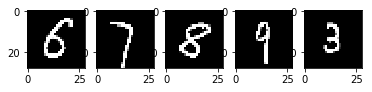

In [5]:
fig, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(nrows=1, ncols=5)
i = 1234
ax1.imshow(scan_test_x[i+1], cmap=plt.get_cmap('gray'))
ax2.imshow(scan_test_x[i+2], cmap=plt.get_cmap('gray'))
ax3.imshow(scan_test_x[i+3], cmap=plt.get_cmap('gray'))
ax4.imshow(scan_test_x[i+4], cmap=plt.get_cmap('gray'))
ax5.imshow(scan_test_x[i+5], cmap=plt.get_cmap('gray'))

fig.show()

In [6]:
import keras
train_x = train_x[:,:,:,np.newaxis].astype(np.float)/255
val_x = val_x[:,:,:,np.newaxis].astype(np.float)/255
train_y = keras.utils.to_categorical(train_y, 10)
val_y = keras.utils.to_categorical(val_y, 10)

scan_test_x = scan_test_x[:,:,:,np.newaxis].astype(np.float)/255

Using TensorFlow backend.


In [7]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout

model = Sequential([
    Conv2D(32, (5,5), activation='relu', input_shape=(28, 28, 1),dilation_rate=(1, 1)),
    Conv2D(64, (5,5), activation='relu',dilation_rate=(1, 1)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dropout(0.5),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.SGD(),
             metrics=['accuracy'])

In [9]:
import time
start = time.time()
model.fit(train_x,        # training data
          train_y,        # training labels
          batch_size=16,  # how many training examples you want to give at once
          verbose=1,      # print progress in console
          validation_data=(val_x, val_y),  # validation data to check generalization
          epochs=10)       # how many times to go through the entire training set
end = time.time()
print("Training took", end-start, "seconds.")


Train on 62500 samples, validate on 11280 samples
Epoch 1/10
62500/62500 [==============================] - 17s 278us/step - loss: 0.4385 - accuracy: 0.8598 - val_loss: 0.1039 - val_accuracy: 0.9690
Epoch 2/10
62500/62500 [==============================] - 16s 250us/step - loss: 0.1509 - accuracy: 0.9547 - val_loss: 0.0697 - val_accuracy: 0.9776
Epoch 3/10
62500/62500 [==============================] - 16s 252us/step - loss: 0.1126 - accuracy: 0.9660 - val_loss: 0.0499 - val_accuracy: 0.9850
Epoch 4/10
62500/62500 [==============================] - 16s 255us/step - loss: 0.0954 - accuracy: 0.9711 - val_loss: 0.0472 - val_accuracy: 0.9846
Epoch 5/10
62500/62500 [==============================] - 16s 250us/step - loss: 0.0816 - accuracy: 0.9753 - val_loss: 0.0398 - val_accuracy: 0.9871
Epoch 6/10
62500/62500 [==============================] - 16s 251us/step - loss: 0.0740 - accuracy: 0.9775 - val_loss: 0.0380 - val_accuracy: 0.9876
Epoch 7/10
62500/62500 [==============================] 

In [10]:
import csv
import os
pred = np.argmax(model.predict(scan_test_x),axis = 1)
with open('res.csv','w',newline='')as f:
            csv_write=csv.writer(f)
            csv_write.writerow(['Id','Category'])
            for i in range(len(pred)):
                csv_write.writerow([i,pred[i]])
